In [33]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

RuntimeError: ignored

In [34]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt 
import cv2
import pickle
import tensorflow as tf

In [ ]:
# Import necessary libraries
import tensorflow_datasets as tfds
import tensorflow as tf
import os

# Set number of images to download
num_images = 1000

# Define directory to save images
save_dir = '/content/drive/MyDrive/coco-images'

# Create directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Load COCO dataset
dataset, info = tfds.load('coco/2017', split='train', with_info=True)

# Loop through dataset and download images
count = 0
for example in dataset:
    # Get image and file name
    image = example['image']
    file_name = 'coco-images/' + str(count) + '.jpg'
    
    # Save image to drive
    tf.keras.preprocessing.image.save_img(os.path.join(save_dir, str(count) + '.jpg'), image)
    
    # Increment count
    count += 1
    
    # Break loop when desired number of images is reached
    if count == num_images:
        break

In [36]:
data_dir = "/content/drive/MyDrive/plant_data(5)"
training_data = "/content/drive/MyDrive/plant_data_train(5d-v2)"
testing_data = "/content/drive/MyDrive/plant_data_test(5d-v2)"

In [ ]:
new_data = '/content/drive/MyDrive/New Plant Classes'

In [ ]:
i=0
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image) 
    # img = cv2.imread(image_path)
    i+=1
print(i)

9806


In [ ]:
j=0
for image_class in os.listdir(new_data):
  for image in os.listdir(os.path.join(new_data, image_class)):
    image_path = os.path.join(new_data, image_class, image)
    with tf.io.gfile.GFile(image_path, 'rb') as f: #Read images in binary fomat
      image_data = f.read()

      # Decode image
      try:
          image = tf.io.decode_image(image_data) 
          # image = tf.d
          print("Image is in a supported format.")
      except:
          print("Image is not in a supported format.")
          j = j+1
          os.remove(image_path)
print(j)

Streaming output truncated to the last 5000 lines.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a supported format.
Image is in a support

In [ ]:
class_names = os.listdir(data_dir)
# for image_class in os.listdir(data_dir):
#   class_names.append(image_class)

class_names

['Tulsi',
 'Rubber Plant',
 'Money Plant',
 'Peace Lily',
 'Philodendron',
 'Aloe Vera',
 'Spider Plant',
 'ZZ Plant',
 'Snake Plant',
 'Areca Palm']

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    if image.endswith('.jpg'):
      new_file_name = os.path.join(data_dir,image_class,image.replace(".jpg",".jpeg"))
      os.rename(os.path.join(data_dir,image_class,image),new_file_name)
    

In [ ]:
for image_class in os.listdir(new_data):
  for image in os.listdir(os.path.join(new_data, image_class)):
    if image.endswith('.png'):
      new_file_name = os.path.join(new_data,image_class,image.replace(".png",".jpeg"))
      os.rename(os.path.join(new_data,image_class,image),new_file_name)

In [ ]:
import os
import random
import shutil

input_folder = '/content/drive/MyDrive/New Plant Classes'
train_folder = '/content/drive/MyDrive/New_Plant_train'
test_folder = '/content/drive/MyDrive/New_Plant_test'

train_percentage = 0.8

for class_label in os.listdir(input_folder):

    os.makedirs(os.path.join(train_folder, class_label), exist_ok=True)
    os.makedirs(os.path.join(test_folder, class_label), exist_ok=True)

    images = os.listdir(os.path.join(input_folder, class_label))

    random.shuffle(images)

    num_train = int(len(images) * train_percentage)
    num_test = len(images) - num_train

    for i in range(num_train):
        shutil.copy(os.path.join(input_folder, class_label, images[i]), os.path.join(train_folder, class_label))

    # Copy the testing images to the test folder
    for i in range(num_train, num_train + num_test):
        shutil.copy(os.path.join(input_folder, class_label, images[i]), os.path.join(test_folder, class_label))

In [ ]:
import os
import random
import shutil

# Define the input folder and the output folders for train and test sets
input_folder = '/content/drive/MyDrive/coco-images'
train_folder = '/content/drive/MyDrive/coco-images_train'
test_folder = '/content/drive/MyDrive/coco-images_test'

# Define the percentage of data to use for training
train_percentage = 0.8

# Create the train and test folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Get a list of all images in the input folder
images = os.listdir(input_folder)

# Shuffle the images randomly
random.shuffle(images)

# Calculate the number of images to use for training and testing
num_train = int(len(images) * train_percentage)
num_test = len(images) - num_train

# Copy the training images to the train folder
for i in range(num_train):
    src = os.path.join(input_folder, images[i])
    dst = os.path.join(train_folder, images[i])
    shutil.copy(src, dst)

# Copy the testing images to the test folder
for i in range(num_train, num_train + num_test):
    src = os.path.join(input_folder, images[i])
    dst = os.path.join(test_folder, images[i])
    shutil.copy(src, dst)

print("Train and test folders created successfully.")

Train and test folders created successfully.


In [37]:
train_data = '/content/drive/MyDrive/plant_data_train(5d-v2)'
test_data = '/content/drive/MyDrive/plant_data_test(5d-v2)'
train_data

'/content/drive/MyDrive/plant_data_train(5d-v2)'

In [38]:
from keras.layers import Input, Lambda,Dense, GlobalAveragePooling2D, Flatten
from keras.models import Model
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam



In [39]:
def preprocess_image_1(image_path):
  if isinstance(image_path, str):
    # Load the image from the file path
    img = tf.keras.utils.load_img(image_path, target_size=(512, 512))
  else:
    # Assume that image_path is already a numpy array
    img = tf.keras.preprocessing.image.array_to_img(image_path)

  img_array = tf.keras.preprocessing.image.img_to_array(img)
  processed_img = preprocess_input(img_array)

  return processed_img

In [40]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_image_1, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [41]:
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_image_1)

In [42]:
training_set = train_datagen.flow_from_directory(train_data,
                                                 target_size = (512, 512),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8934 images belonging to 11 classes.


In [43]:
test_set = test_datagen.flow_from_directory(test_data,
                                            target_size = (512, 512),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3233 images belonging to 11 classes.


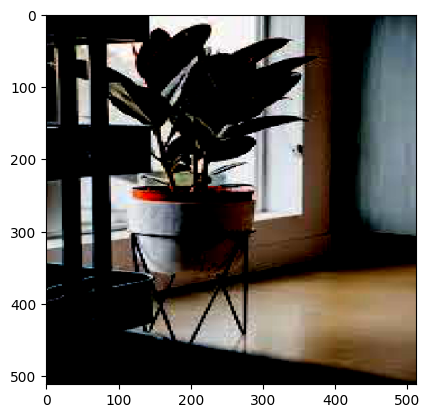

(512, 512, 3)


In [44]:
import matplotlib.pyplot as plt

# Get the next batch of images and labels
batch_images, batch_labels = test_set.next()

# Select the first image in the batch
image = batch_images[1]


# Display the image
plt.imshow(image)
plt.show()
print(batch_images[1].shape)

In [49]:
inresnet=InceptionResNetV2(weights='imagenet',include_top=False, input_shape = (512,512,3))

In [46]:
for layer in inresnet.layers:
  layer.trainable=False

In [ ]:
x = inresnet.output 
x = GlobalAveragePooling2D()(x)

In [ ]:
prediction = Dense(16, activation='softmax')(x)
model = Model(inputs = inresnet.input, outputs = prediction)

In [ ]:
model.summary()

In [ ]:
model.layers[-1].output

<KerasTensor: shape=(None, 16) dtype=float32 (created by layer 'dense')>

In [ ]:
# optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])


In [ ]:
hist = model.fit(training_set,batch_size=32, epochs=30, validation_data=test_set)

# print('Input data shape:', X_train.shape)
# print('Target label shape:', y_train.shape)
# print('Model output shape:', model.predict(X_train).shape)

Epoch 1/30
407/407 [==============================] - 1770s 4s/step - loss: 1.7444 - accuracy: 0.5157 - val_loss: 1.2271 - val_accuracy: 0.6675
Epoch 2/30
407/407 [==============================] - 987s 2s/step - loss: 1.1706 - accuracy: 0.6790 - val_loss: 1.0365 - val_accuracy: 0.7079
Epoch 3/30
407/407 [==============================] - 987s 2s/step - loss: 1.0056 - accuracy: 0.7167 - val_loss: 0.9105 - val_accuracy: 0.7405
Epoch 4/30
407/407 [==============================] - 974s 2s/step - loss: 0.9185 - accuracy: 0.7413 - val_loss: 0.8573 - val_accuracy: 0.7561
Epoch 5/30
407/407 [==============================] - 969s 2s/step - loss: 0.8554 - accuracy: 0.7486 - val_loss: 0.8051 - val_accuracy: 0.7608
Epoch 6/30
407/407 [==============================] - 968s 2s/step - loss: 0.8022 - accuracy: 0.7665 - val_loss: 0.7888 - val_accuracy: 0.7671
Epoch 7/30
407/407 [==============================] - 966s 2s/step - loss: 0.7647 - accuracy: 0.7740 - val_loss: 0.7352 - val_accuracy: 0.788

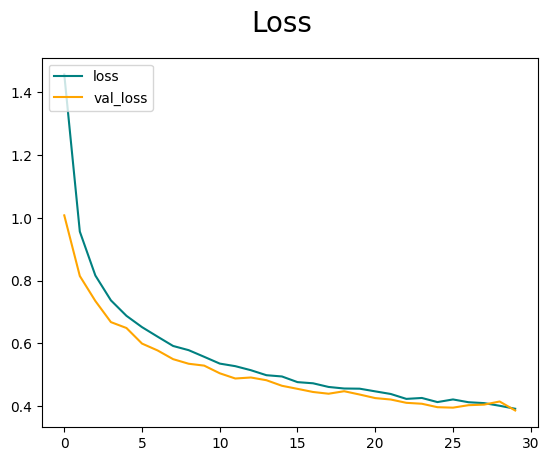

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

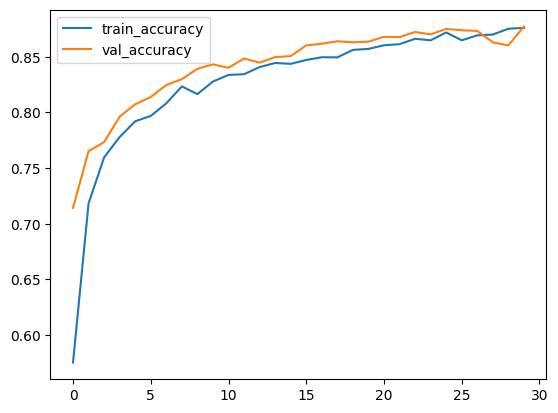

In [ ]:
plt.plot(hist.history['accuracy'],label='train_accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
model.save(os.path.join('/content/drive/MyDrive/models','plant_classification_inception_v2_m9'))

In [47]:
from tensorflow.keras.models import load_model
model_in = load_model('/content/drive/MyDrive/models/plant_classification_inception_v2_m9')

In [ ]:
class_labels

['Aloe Vera',
 'Areca Palm',
 'Money Plant',
 'No Plant',
 'Peace Lily',
 'Philodendron',
 'Rubber Plant',
 'Snake Plant',
 'Spider Plant',
 'Tulsi',
 'ZZ Plant']

1/1 [==============================] - 4s 4s/step


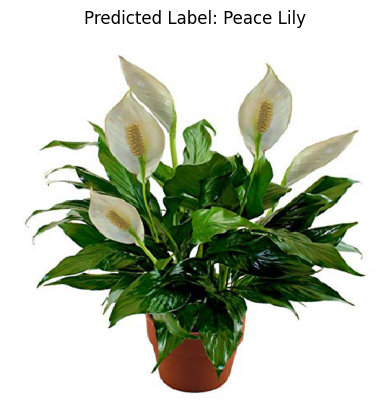

In [48]:
image_path_test = '/content/drive/MyDrive/peace_test_img.jpg' 
new_img = tf.keras.utils.load_img(image_path_test, target_size=(512, 512))

# Preprocess the image
processed_img = preprocess_image_1(image_path_test)

# Predict the class probabilities of the image
prediction = model_in.predict(np.array([processed_img]))
predicted_class_index = np.argmax(prediction)
predicted_class_probability = prediction[0, predicted_class_index]

# Set the threshold value
threshold = 0.6

# Get the class labels
class_labels = list(training_set.class_indices.keys())

# Make the prediction based on the threshold
if predicted_class_probability >= threshold:
    predicted_class_label = class_labels[predicted_class_index]
else:
    predicted_class_label = "No Plant"

# Display the image with the predicted label
plt.imshow(new_img)
plt.title('Predicted Label: {}'.format(predicted_class_label))
plt.axis('off')
plt.show()
